In [1]:
import os
import pandas as pd
from datetime import datetime
from datetime import timedelta
import math
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import xarray as xr
import pvlib

from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.metrics import confusion_matrix

In [2]:
dir='D:/S2-MPJ/Tesis/data/3.ahifull/gabung_raw/'
dir2='D:/S2-MPJ/Tesis/data/21.nogeser_3/'
dir3='D:/S2-MPJ/Tesis/data/7.studi_kasus/2022_10_16/1b.hasil_nogeser/'
dir4='D:/S2-MPJ/Tesis/data/7.studi_kasus/2022_10_17/1b.hasil_nogeser/'
dir5='D:/S2-MPJ/Tesis/data/22.sk/2022_10_16/'
dir6='D:/S2-MPJ/Tesis/data/22.sk/2022_10_17/'
dir7='D:/S2-MPJ/Tesis/data/22.sk/1617/'
dir8='D:/S2-MPJ/Tesis/data/22.sk/202208/'

# Eksplorasi Data

In [68]:
raw=pd.read_csv(dir2+'2.raw_gabung.csv')

In [69]:
print(len(raw), raw.columns)

1933530 Index(['latitude', 'longitude', 'time', 'V1', 'V2', 'VS', 'N1', 'N2', 'N3',
       'I4', 'WV', 'W2', 'W3', 'MI', 'O3', 'IR', 'L2', 'I2', 'CO', 'elevasi',
       'zenith', 'rr', 'cth1', 'cth2', 'wv1', 'wv2', 'lwp1', 'lwp2', 'cp1',
       'cp2'],
      dtype='object')


In [70]:
kolom = ['latitude', 'longitude', 'time', 'V1', 'V2', 'VS', 'N1', 'N2', 'N3', 'I4', 'WV',
       'W2', 'W3', 'MI', 'O3', 'IR', 'L2', 'I2', 'CO', 'elevasi', 'zenith',
       'rr', 'cth1', 'cth2', 'wv1', 'wv2', 'lwp1', 'lwp2', 'cp1', 'cp2']
df=raw[kolom]
df.columns

Index(['latitude', 'longitude', 'time', 'V1', 'V2', 'VS', 'N1', 'N2', 'N3',
       'I4', 'WV', 'W2', 'W3', 'MI', 'O3', 'IR', 'L2', 'I2', 'CO', 'elevasi',
       'zenith', 'rr', 'cth1', 'cth2', 'wv1', 'wv2', 'lwp1', 'lwp2', 'cp1',
       'cp2'],
      dtype='object')

In [71]:
var=['V1', 'V2', 'VS', 'N1', 'N2', 'N3',
     'I4', 'WV', 'W2', 'W3', 'MI', 'O3', 'IR', 'L2', 'I2', 'CO','rr']
dfvar=df[var]
missing_values=dfvar.isnull().sum()

In [72]:
missing_values

V1      1729
V2      1697
VS      1939
N1      1791
N2      1689
N3      1673
I4      1727
WV      1728
W2      1694
W3      1669
MI      1669
O3      1732
IR      1699
L2      1671
I2      1686
CO      1683
rr    582692
dtype: int64

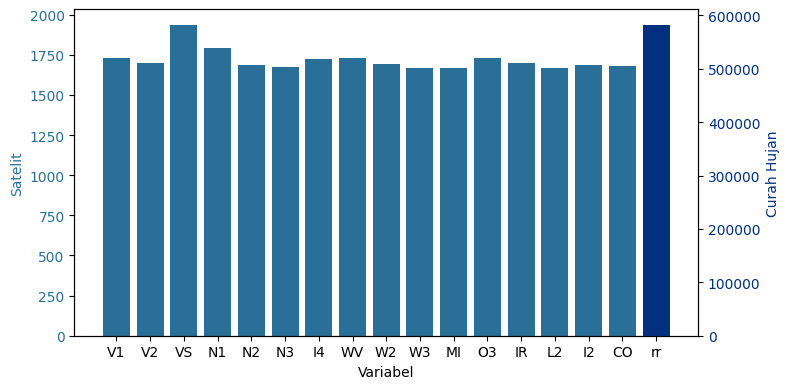

In [73]:
# Separate the 'rr' variable
missing_values_main = missing_values.drop('rr')
missing_rr = missing_values['rr']

fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot the main variables
ax1.bar(missing_values_main.index, missing_values_main, color='#2a6f97')
ax1.set_xlabel('Variabel')
ax1.set_ylabel('Satelit', color='#2a6f97')
ax1.tick_params(axis='y', labelcolor='#2a6f97')
ax1.tick_params(axis='x', rotation=0)  # Rotate the x labels for better readability

# Create a second y-axis for 'rr'
ax2 = ax1.twinx()
ax2.bar('rr', missing_rr, color='#01307e')
ax2.set_ylabel('Curah Hujan', color='#01307e')
ax2.tick_params(axis='y', labelcolor='#01307e')

#plt.title('Jumlah Data dengan Nilai Kosong')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()


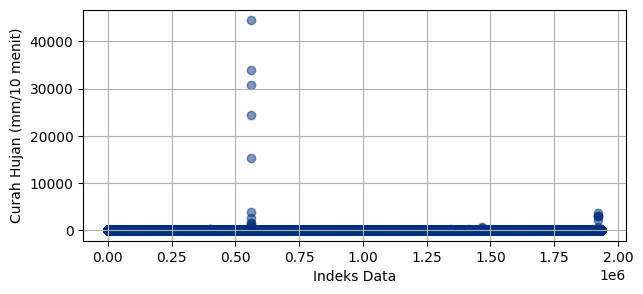

In [74]:
index_values = range(len(df))

# Plotting the rainfall rate variable against the index values
plt.figure(figsize=(7, 3))
plt.scatter(index_values, df['rr'], alpha=0.5, color='#01307e')
#plt.title('Scatter Plot Curah Hujan')
plt.xlabel('Indeks Data')
plt.ylabel('Curah Hujan (mm/10 menit)')
plt.grid(True)
plt.show()

In [88]:
dfr=df[df['rr']>0]
koloms=['rr']
dfrr=dfr[koloms]

In [76]:
dfr['rr'].nlargest(5)

561841    44466.0
561811    33874.4
561721    30748.2
561961    24406.6
561751    15218.0
Name: rr, dtype: float64

In [77]:
df['rr'].describe()

count    1.350838e+06
mean     1.989503e-01
std      6.068400e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.446600e+04
Name: rr, dtype: float64

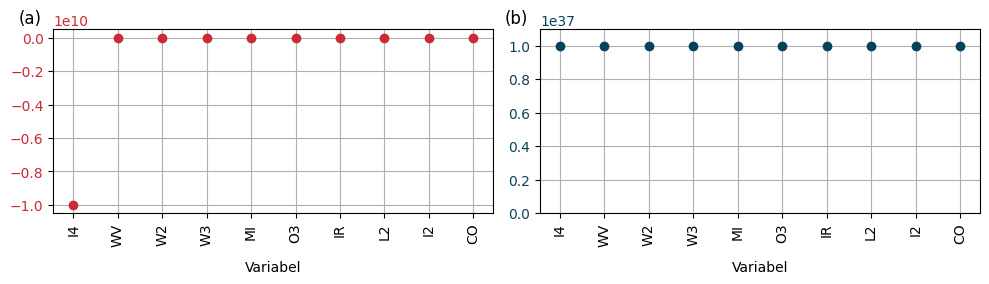

In [153]:
kolir = ['I4', 'WV', 'W2', 'W3', 'MI', 'O3', 'IR', 'L2', 'I2', 'CO']
dfir = df[kolir]
min_values_dfir = dfir.min()
max_values_dfir = dfir.max()

# Plotting with dual y-axes in two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

# Plotting minimum values
ax1.plot(min_values_dfir, marker='o', linestyle='', color='#cc2936')
ax1.set_xlabel('Variabel', labelpad=10, fontsize=10)
#ax1.set_ylabel('Nilai Minimum', color='#cc2936', labelpad=10, fontsize=10)
ax1.tick_params(axis='y', labelcolor='#cc2936')
ax1.grid(True)

# Add annotation (a) in upper left
ax1.text(-0.08, 1.11, '(a)', transform=ax1.transAxes, color='k',
         fontsize=12, verticalalignment='top')

# Plotting maximum values
ax2.plot(max_values_dfir, marker='o', linestyle='', color='#08415c')
ax2.set_xlabel('Variabel', labelpad=10, fontsize=10)
#ax2.set_ylabel('Nilai Maksimum', color='#08415c', labelpad=10, fontsize=10)
ax2.tick_params(axis='y', labelcolor='#08415c')
ax2.grid(True)

# Add annotation (b) in upper left
ax2.text(-0.08, 1.11, '(b)', transform=ax2.transAxes, color='k',
         fontsize=12, verticalalignment='top')

# Set y-axis limit for ax2 to start from 0 with a buffer
max_value = max_values_dfir.max()  # Get the maximum value in the max_values_dfir
buffer = 0.1 * max_value  # Buffer set to 10% of the maximum value
ax2.set_ylim(0, max_value + buffer)

# Rotate x-axis labels for better readability
ax1.set_xticklabels(min_values_dfir.index, rotation=90, fontsize=10)
ax2.set_xticklabels(max_values_dfir.index, rotation=90, fontsize=10)

plt.tight_layout()
plt.show()

In [38]:
dfir['IR'].nlargest(5)

1123500    9.969210e+36
1123501    9.969210e+36
1123502    9.969210e+36
1123503    9.969210e+36
1123504    9.969210e+36
Name: IR, dtype: float64

In [155]:
dfsiang=df[df['zenith']<70]
print('Jumlah outlier:','\n',
    'maksimum:','\n',
    'V1',len(dfsiang[dfsiang['V1']>1]),
    'V2',len(dfsiang[dfsiang['V2']>1]),
    'VS',len(dfsiang[dfsiang['VS']>1]),
    'N1',len(dfsiang[dfsiang['N1']>1]),
    'N2',len(dfsiang[dfsiang['N2']>1]),
    'N3',len(dfsiang[dfsiang['N3']>1]),'\n',
    
    'minimum:','\n',
    'V1',len(dfsiang[dfsiang['V1']<0]),
    'V2',len(dfsiang[dfsiang['V2']<0]),
    'VS',len(dfsiang[dfsiang['VS']<0]),
    'N1',len(dfsiang[dfsiang['N1']<0]),
    'N2',len(dfsiang[dfsiang['N2']<0]),
    'N3',len(dfsiang[dfsiang['N3']<0]),'\n',
    
    'inframerah:','\n',
    'I4',len(df[df['I4']>996921]),
    'WV',len(df[df['WV']>996921]),
    'W2',len(df[df['W2']>996921]),
    'W3',len(df[df['W3']>996921]),
    'MI',len(df[df['MI']>996921]),'\n',
    'O3',len(df[df['O3']>996921]),
    'IR',len(df[df['IR']>996921]),
    'L2',len(df[df['L2']>996921]),
    'I2',len(df[df['I2']>996921]),
    'CO',len(df[df['CO']>996921]),'\n',

    'inframerah terendah:','\n',
    'I4',len(df[df['I4']<161.96]),
    'WV',len(df[df['WV']<161.96]),
    'W2',len(df[df['W2']<161.96]),
    'W3',len(df[df['W3']<161.96]),
    'MI',len(df[df['MI']<161.96]),'\n',
    'O3',len(df[df['O3']<161.96]),
    'IR',len(df[df['IR']<161.96]),
    'L2',len(df[df['L2']<161.96]),
    'I2',len(df[df['I2']<161.96]),
    'CO',len(df[df['CO']<161.96])
    )

Jumlah outlier: 
 maksimum: 
 V1 232 V2 135 VS 212 N1 350 N2 6 N3 6 
 minimum: 
 V1 30 V2 30 VS 60 N1 30 N2 76 N3 336 
 inframerah: 
 I4 90 WV 180 W2 60 W3 90 MI 30 
 O3 60 IR 120 L2 150 I2 150 CO 180 
 inframerah terendah: 
 I4 502 WV 390 W2 420 W3 391 MI 394 
 O3 415 IR 398 L2 434 I2 388 CO 372


# pre-processing per kluster

## cleaning

In [3]:
klus=os.listdir(dir2)
kluster=klus[:12]
kluster

['1.elnino1.csv',
 '1.elnino2.csv',
 '1.elnino3.csv',
 '1.elnino4.csv',
 '1.lanina1.csv',
 '1.lanina2.csv',
 '1.lanina3.csv',
 '1.lanina4.csv',
 '1.normal1.csv',
 '1.normal2.csv',
 '1.normal3.csv',
 '1.normal4.csv']

In [5]:
for a in kluster:
    #baca data
    df=pd.read_csv(dir2+a)

    #clean missing value
    dfclean=df.dropna().reset_index(drop=True)

    #clean rr
    dfclean2=dfclean[dfclean['rr']<=30]

    # clean outlier satelit
    ## filter IR
    df7=dfclean2[dfclean2['I4']>=161.96]
    df8=df7[df7['WV']>=161.96]
    df9=df8[df8['W2']>=161.96]
    df10=df9[df9['W3']>=161.96]
    df11=df10[df10['MI']>=161.96]
    df12=df11[df11['O3']>=161.96]
    df13=df12[df12['IR']>=161.96]
    df14=df13[df13['L2']>=161.96]
    df15=df14[df14['I2']>=161.96]
    df16=df15[df15['CO']>=161.96]

    df17=df16[df16['I4']<996921]
    df18=df17[df17['WV']<996921]
    df19=df18[df18['W2']<996921]
    df20=df19[df19['W3']<996921]
    df21=df20[df20['MI']<996921]
    df22=df21[df21['O3']<996921]
    df23=df22[df22['IR']<996921]
    df24=df23[df23['L2']<996921]
    df25=df24[df24['I2']<996921]
    dfclean3=df25[df25['CO']<996921]


    ## filter VNIR
    nite=dfclean3[dfclean3['zenith']>=70]
    day=dfclean3[dfclean3['zenith']<70]
    #print(len(day),len(nite),(len(day)+len(nite)))

    df2=day[day['V1'] >= 0]
    df3=df2[df2['V2'] >= 0]
    df4=df3[df3['VS'] >= 0]
    df5=df4[df4['N1'] >= 0]
    df6=df5[df5['N2'] >= 0]
    df7=df6[df6['N3'] >= 0]

    df8=df7[df7['V1'] <= 1]
    df9=df8[df8['V2'] <= 1]
    df10=df9[df9['V2'] <= 1]
    df11=df10[df10['V2'] <= 1]
    df12=df11[df11['V2'] <= 1]
    df13=df12[df12['V2'] <= 1]
    dfclean4 = pd.concat([df13, nite])

    dfclean4.to_csv(dir2+'4.clean_'+a[2:])
    print(a[2:],len(df), len(dfclean), len(dfclean2), len(dfclean3), len(dfclean4))

elnino1.csv 101880 48989 48989 48989 48853
elnino2.csv 154740 97118 97116 97058 97044
elnino3.csv 135840 116555 116555 116555 116555
elnino4.csv 160980 142384 142382 142382 142379
lanina1.csv 169140 97251 97227 97204 97146
lanina2.csv 192360 145736 145716 145684 145650
lanina3.csv 193770 158442 158416 158389 158387
lanina4.csv 208440 152910 152799 152642 152574
normal1.csv 178440 73896 73836 73797 73762
normal2.csv 178110 136173 136168 136161 136132
normal3.csv 129750 83621 83621 83621 83579
normal4.csv 130080 95133 95127 95003 95002


## balancing

In [7]:
cklus=os.listdir(dir2)
ckluster=cklus[14:26]
ckluster

['4.clean_elnino1.csv',
 '4.clean_elnino2.csv',
 '4.clean_elnino3.csv',
 '4.clean_elnino4.csv',
 '4.clean_lanina1.csv',
 '4.clean_lanina2.csv',
 '4.clean_lanina3.csv',
 '4.clean_lanina4.csv',
 '4.clean_normal1.csv',
 '4.clean_normal2.csv',
 '4.clean_normal3.csv',
 '4.clean_normal4.csv']

In [8]:
#pengkelasan rr menjadi hujan/tdk hujan/nan
for b in ckluster:
    df=pd.read_csv(dir2+b)
    hujan=df['rr']
    rr_biner=[]

    for f in hujan:
        if f==0:
            ff=0
        elif f>0:
            ff=1
        else:
            ff=np.nan
        rr_biner.append(ff)
    df['rr_biner']=rr_biner
    
    df.to_csv(dir2+b)
    print(b)

4.clean_elnino1.csv
4.clean_elnino2.csv
4.clean_elnino3.csv
4.clean_elnino4.csv
4.clean_lanina1.csv
4.clean_lanina2.csv
4.clean_lanina3.csv
4.clean_lanina4.csv
4.clean_normal1.csv
4.clean_normal2.csv
4.clean_normal3.csv
4.clean_normal4.csv


In [57]:
cklus=os.listdir(dir2)
ckluster=cklus[14:26]
ckluster

['4.clean_elnino1.csv',
 '4.clean_elnino2.csv',
 '4.clean_elnino3.csv',
 '4.clean_elnino4.csv',
 '4.clean_lanina1.csv',
 '4.clean_lanina2.csv',
 '4.clean_lanina3.csv',
 '4.clean_lanina4.csv',
 '4.clean_normal1.csv',
 '4.clean_normal2.csv',
 '4.clean_normal3.csv',
 '4.clean_normal4.csv']

In [26]:
df=pd.read_csv(dir2+'4.clean_normal4.csv')

In [27]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'latitude', 'longitude',
       'time', 'V1', 'V2', 'VS', 'N1', 'N2', 'N3', 'I4', 'WV', 'W2', 'W3',
       'MI', 'O3', 'IR', 'L2', 'I2', 'CO', 'elevasi', 'zenith', 'rr', 'cth1',
       'cth2', 'wv1', 'wv2', 'lwp1', 'lwp2', 'cp1', 'cp2', 'oni_encod',
       'musim_encod', 'rr_biner'],
      dtype='object')

In [58]:
#hitung jlh data sebelum smote
for b in ckluster:
    raw=pd.read_csv(dir2+b)
    #########################
    #print(b[9:])
    tdk=raw[raw['rr']==0]
    df=raw[raw['rr']>0]
    conditions = [
            (df['rr'] > 0) & (df['rr'] < 0.8),
            (df['rr'] >= 0.8) & (df['rr'] < 1.6),
            (df['rr'] >= 1.6) & (df['rr'] <= 3.3),
            (df['rr'] > 3.3)
            ]
    classes = [1,2,3,4]

    df['classrr'] = np.select(conditions, classes, default=np.nan)
    class_counts = df['classrr'].value_counts()
    print(b[8:],"Before SMOTE all:", 'raw', len(raw), '0:', len(tdk), Counter(df['classrr']))

elnino1.csv Before SMOTE all: raw 48853 0: 45700 Counter({1.0: 2197, 2.0: 365, 4.0: 298, 3.0: 293})
elnino2.csv Before SMOTE all: raw 97044 0: 91335 Counter({1.0: 3983, 2.0: 651, 4.0: 566, 3.0: 509})
elnino3.csv Before SMOTE all: raw 116555 0: 112695 Counter({1.0: 2755, 2.0: 553, 3.0: 342, 4.0: 210})
elnino4.csv Before SMOTE all: raw 142379 0: 140065 Counter({1.0: 1517, 2.0: 273, 4.0: 273, 3.0: 251})
lanina1.csv Before SMOTE all: raw 97146 0: 88228 Counter({1.0: 6057, 2.0: 1136, 3.0: 863, 4.0: 862})
lanina2.csv Before SMOTE all: raw 145650 0: 139024 Counter({1.0: 4390, 4.0: 787, 2.0: 781, 3.0: 668})
lanina3.csv Before SMOTE all: raw 158387 0: 152772 Counter({1.0: 3975, 2.0: 644, 3.0: 523, 4.0: 473})
lanina4.csv Before SMOTE all: raw 152574 0: 143579 Counter({1.0: 5859, 4.0: 1113, 2.0: 1111, 3.0: 912})
normal1.csv Before SMOTE all: raw 73762 0: 67462 Counter({1.0: 4261, 2.0: 723, 4.0: 714, 3.0: 602})
normal2.csv Before SMOTE all: raw 136132 0: 129336 Counter({1.0: 4564, 2.0: 833, 4.0: 7

In [59]:
#proses smote per kluster day, twi, nite
for b in ckluster:
        raw=pd.read_csv(dir2+b)
        #########################
        print(b[8:])
        tdk=raw[raw['rr']==0]
        df=raw[raw['rr']>0]
        conditions = [
                (df['rr'] > 0) & (df['rr'] < 0.8),
                (df['rr'] >= 0.8) & (df['rr'] < 1.6),
                (df['rr'] >= 1.6) & (df['rr'] <= 3.3),
                (df['rr'] > 3.3)
                ]
        classes = [1,2,3,4]

        df['classrr'] = np.select(conditions, classes, default=np.nan)
        class_counts = df['classrr'].value_counts()
        print("Before SMOTE all:", '0:', len(tdk), Counter(df['classrr']))
        #########################
        day=raw[raw['zenith']<70]
        tdk=day[day['rr']==0]
        df=day[day['rr']>0]
        conditions = [
        (df['rr'] > 0) & (df['rr'] < 0.8),
        (df['rr'] >= 0.8) & (df['rr'] < 1.6),
        (df['rr'] >= 1.6) & (df['rr'] <= 3.3),
        (df['rr'] > 3.3)
        ]
        classes = [1,2,3,4]

        df['classrr'] = np.select(conditions, classes, default=np.nan)
        class_counts = df['classrr'].value_counts()
        print("Before SMOTE day:", Counter(df['classrr']))
        #print(class_counts)

        #----- smote hujan normal, lebat, sangat lebat -----#
        # Exclude class 1 from SMOTE
        rr_subset = df[df['classrr'] != 1]

        # Initialize SMOTE
        #smote = SMOTE()
        df['classrr']=df['classrr'].astype(int)
        c1=df[df['classrr']==1]
        c2=df[df['classrr']==2]
        c3=df[df['classrr']==3]
        c4=df[df['classrr']==4]
        synthetic_count = {
                        1: int(len(c1)),
                        2: int(1.5*len(c2)),
                        3: int(1.5*len(c3)),
                        4: int(1.5*len(c4))
                        }
        # Create SMOTE object with sampling strategy
        smote = SMOTE(sampling_strategy=synthetic_count)

        kolom=['V1', 'V2', 'VS', 'N1', 'N2', 'N3', 'I4',
               'WV', 'W2', 'W3', 'MI', 'O3', 'IR', 'L2', 'I2', 'CO',
               'elevasi', 'zenith', 'rr', 'cth1', 'cth2', 'wv1', 'wv2', 'lwp1', 'lwp2', 'cp1', 'cp2', 'oni_encod', 'musim_encod', 'rr_biner']
        X = df[kolom]
        y = df['classrr']

        # Apply SMOTE to balance the dataset
        X_resampled, y_resampled = smote.fit_resample(X, y)

        # Combine resampled data with original class 1 data
        rr_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                                pd.DataFrame(y_resampled, columns=['classrr'])], axis=1)

        # Check the distribution of classes after oversampling
        class_counts = rr_resampled['classrr'].value_counts()
        print("After SMOTE day:", Counter(rr_resampled['classrr']))

        #----- undersampling hujan ringan -----#
        max_length = class_counts[1:5].max()
        # Undersample class 1 to match the maximum length
        class_1_indices = rr_resampled[rr_resampled['classrr'] == 1].index
        undersampled_class_1_indices = np.random.choice(class_1_indices, size=max_length, replace=False)
        undersampled_class_1 = rr_resampled.loc[undersampled_class_1_indices]

        # Get classes 2, 3, and 4
        classes_2_3_4 = rr_resampled[(rr_resampled['classrr'] == 2) | (rr_resampled['classrr'] == 3) | (rr_resampled['classrr'] == 4)]

        # Combine undersampled class 1 with classes 2, 3, and 4
        undersampled_data = pd.concat([undersampled_class_1, classes_2_3_4])

        # Display the class distribution after undersampling
        print("After undersampling day:", Counter(undersampled_data['classrr']))

        #----- undersampling tidak hujan -----#
        tidakhujan=day[day['rr']==0]
        tidakhujan['classrr'] = 0
        kolom2=['V1', 'V2', 'VS', 'N1', 'N2', 'N3', 'I4',
               'WV', 'W2', 'W3', 'MI', 'O3', 'IR', 'L2', 'I2', 'CO',
               'elevasi', 'zenith', 'rr', 'cth1', 'cth2', 'wv1', 'wv2', 'lwp1', 'lwp2', 'cp1', 'cp2', 'oni_encod', 'musim_encod', 'rr_biner', 'classrr']
        df2=tidakhujan[kolom2]
        #df2['rainfall_class'] = 0

        n_sample=len(undersampled_data)
        random=resample(df2, n_samples=n_sample)

        #print('tidakhujan:', len(df2), 'undersampling:', len(random))

        gabday=pd.concat([undersampled_data,random])
        #print('day:','asli:', len(df), 'smote', len(gabday))

        ##############################
        #########################
        twi=raw[(raw['zenith']>=70) & (raw['zenith']<=108)]
        tdk=twi[twi['rr']==0]
        df=twi[twi['rr']>0]
        conditions = [
        (df['rr'] > 0) & (df['rr'] < 0.8),
        (df['rr'] >= 0.8) & (df['rr'] < 1.6),
        (df['rr'] >= 1.6) & (df['rr'] <= 3.3),
        (df['rr'] > 3.3)
        ]
        classes = [1,2,3,4]

        df['classrr'] = np.select(conditions, classes, default=np.nan)
        class_counts = df['classrr'].value_counts()
        print("Before SMOTE twi:", Counter(df['classrr']))
        #print(class_counts)

        #----- smote hujan normal, lebat, sangat lebat -----#
        # Exclude class 1 from SMOTE
        rr_subset = df[df['classrr'] != 1]

        # Initialize SMOTE
        #smote = SMOTE()
        df['classrr']=df['classrr'].astype(int)
        c1=df[df['classrr']==1]
        c2=df[df['classrr']==2]
        c3=df[df['classrr']==3]
        c4=df[df['classrr']==4]
        synthetic_count = {
                        1: int(len(c1)),
                        2: int(1.5*len(c2)),
                        3: int(1.5*len(c3)),
                        4: int(1.5*len(c4))
                        }
        # Create SMOTE object with sampling strategy
        smote = SMOTE(sampling_strategy=synthetic_count)

        kolom=['V1', 'V2', 'VS', 'N1', 'N2', 'N3', 'I4',
               'WV', 'W2', 'W3', 'MI', 'O3', 'IR', 'L2', 'I2', 'CO',
               'elevasi', 'zenith', 'rr', 'cth1', 'cth2', 'wv1', 'wv2', 'lwp1', 'lwp2', 'cp1', 'cp2', 'oni_encod', 'musim_encod', 'rr_biner']
        X = df[kolom]
        y = df['classrr']

        # Apply SMOTE to balance the dataset
        X_resampled, y_resampled = smote.fit_resample(X, y)

        # Combine resampled data with original class 1 data
        rr_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                                pd.DataFrame(y_resampled, columns=['classrr'])], axis=1)

        # Check the distribution of classes after oversampling
        class_counts = rr_resampled['classrr'].value_counts()
        print("After SMOTE twi:", Counter(rr_resampled['classrr']))

        #----- undersampling hujan ringan -----#
        max_length = class_counts[1:5].max()
        # Undersample class 1 to match the maximum length
        class_1_indices = rr_resampled[rr_resampled['classrr'] == 1].index
        undersampled_class_1_indices = np.random.choice(class_1_indices, size=max_length, replace=False)
        undersampled_class_1 = rr_resampled.loc[undersampled_class_1_indices]

        # Get classes 2, 3, and 4
        classes_2_3_4 = rr_resampled[(rr_resampled['classrr'] == 2) | (rr_resampled['classrr'] == 3) | (rr_resampled['classrr'] == 4)]

        # Combine undersampled class 1 with classes 2, 3, and 4
        undersampled_data = pd.concat([undersampled_class_1, classes_2_3_4])

        # Display the class distribution after undersampling
        print("After undersampling twi:", Counter(undersampled_data['classrr']))

        #----- undersampling tidak hujan -----#
        tidakhujan=twi[twi['rr']==0]
        tidakhujan['classrr'] = 0
        kolom2=['V1', 'V2', 'VS', 'N1', 'N2', 'N3', 'I4',
               'WV', 'W2', 'W3', 'MI', 'O3', 'IR', 'L2', 'I2', 'CO',
               'elevasi', 'zenith', 'rr', 'cth1', 'cth2', 'wv1', 'wv2', 'lwp1', 'lwp2', 'cp1', 'cp2', 'oni_encod', 'musim_encod', 'rr_biner','classrr']
        df2=tidakhujan[kolom2]
        #df2['rainfall_class'] = 0

        n_sample=len(undersampled_data)
        random=resample(df2, n_samples=n_sample)

        #print('tidakhujan:', len(df2), 'undersampling:', len(random))

        gabtwi=pd.concat([undersampled_data,random])
        #print('day:','asli:', len(df), 'smote', len(gabday))
        ##############################
        ##############################
        nite=raw[raw['zenith']>108]
        df=nite[nite['rr']>0]
        conditions = [
        (df['rr'] > 0) & (df['rr'] < 0.8),
        (df['rr'] >= 0.8) & (df['rr'] < 1.6),
        (df['rr'] >= 1.6) & (df['rr'] <= 3.3),
        (df['rr'] > 3.3)
        ]
        classes = [1,2,3,4]

        df['classrr'] = np.select(conditions, classes, default=np.nan)
        class_counts = df['classrr'].value_counts()
        print("Before SMOTE nite:", Counter(df['classrr']))
        #print(class_counts)

        #----- smote hujan normal, lebat, sangat lebat -----#
        # Exclude class 1 from SMOTE
        rr_subset = df[df['classrr'] != 1]

        # Initialize SMOTE
        #smote = SMOTE()
        df['classrr']=df['classrr'].astype(int)
        c1=df[df['classrr']==1]
        c2=df[df['classrr']==2]
        c3=df[df['classrr']==3]
        c4=df[df['classrr']==4]
        synthetic_count = {
                        1: int(len(c1)),
                        2: int(1.5*len(c2)),
                        3: int(1.5*len(c3)),
                        4: int(1.5*len(c4))
                        }
        # Create SMOTE object with sampling strategy
        smote = SMOTE(sampling_strategy=synthetic_count)

        kolom=['V1', 'V2', 'VS', 'N1', 'N2', 'N3', 'I4',
               'WV', 'W2', 'W3', 'MI', 'O3', 'IR', 'L2', 'I2', 'CO',
               'elevasi', 'zenith', 'rr', 'cth1', 'cth2', 'wv1', 'wv2', 'lwp1', 'lwp2', 'cp1', 'cp2', 'oni_encod', 'musim_encod', 'rr_biner']
        X = df[kolom]
        y = df['classrr']

        # Apply SMOTE to balance the dataset
        X_resampled, y_resampled = smote.fit_resample(X, y)

        # Combine resampled data with original class 1 data
        rr_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                                pd.DataFrame(y_resampled, columns=['classrr'])], axis=1)

        # Check the distribution of classes after oversampling
        class_counts = rr_resampled['classrr'].value_counts()
        print("After SMOTE nite:", Counter(rr_resampled['classrr']))

        #----- undersampling hujan ringan -----#
        max_length = class_counts[1:5].max()
        # Undersample class 1 to match the maximum length
        class_1_indices = rr_resampled[rr_resampled['classrr'] == 1].index
        undersampled_class_1_indices = np.random.choice(class_1_indices, size=max_length, replace=False)
        undersampled_class_1 = rr_resampled.loc[undersampled_class_1_indices]

        # Get classes 2, 3, and 4
        classes_2_3_4 = rr_resampled[(rr_resampled['classrr'] == 2) | (rr_resampled['classrr'] == 3) | (rr_resampled['classrr'] == 4)]

        # Combine undersampled class 1 with classes 2, 3, and 4
        undersampled_data = pd.concat([undersampled_class_1, classes_2_3_4])

        # Display the class distribution after undersampling
        print("After undersampling nite:", Counter(undersampled_data['classrr']))

        #----- undersampling tidak hujan -----#
        tidakhujan=nite[nite['rr']==0]
        tidakhujan['classrr'] = 0
        kolom2=['V1', 'V2', 'VS', 'N1', 'N2', 'N3', 'I4',
               'WV', 'W2', 'W3', 'MI', 'O3', 'IR', 'L2', 'I2', 'CO',
               'elevasi', 'zenith', 'rr', 'cth1', 'cth2', 'wv1', 'wv2', 'lwp1', 'lwp2', 'cp1', 'cp2', 'oni_encod', 'musim_encod', 'rr_biner', 'classrr']
        df2=tidakhujan[kolom2]
        #df2['rainfall_class'] = 0

        n_sample=len(undersampled_data)
        random=resample(df2, n_samples=n_sample)

        #print('tidakhujan:', len(df2), 'undersampling:', len(random))

        gabnite=pd.concat([undersampled_data, random])
        #print('nite:','asli:', len(df), 'smote', len(gabnite))

        newb=pd.concat([gabday, gabtwi, gabnite])
        newb.to_csv(dir2+'5.smote_'+b[8:])
        ######
        tdk=newb[newb['rr']==0]
        df=newb[newb['rr']>0]
        conditions = [
                (df['rr'] > 0) & (df['rr'] < 0.8),
                (df['rr'] >= 0.8) & (df['rr'] < 1.6),
                (df['rr'] >= 1.6) & (df['rr'] <= 3.3),
                (df['rr'] > 3.3)
                ]
        classes = [1,2,3,4]

        df['classrr'] = np.select(conditions, classes, default=np.nan)
        class_counts = df['classrr'].value_counts()
        print("After SMOTE all:", '0:', len(tdk), Counter(df['classrr']),'\n')


elnino1.csv
Before SMOTE all: 0: 45700 Counter({1.0: 2197, 2.0: 365, 4.0: 298, 3.0: 293})
Before SMOTE day: Counter({1.0: 987, 2.0: 181, 3.0: 181, 4.0: 178})
After SMOTE day: Counter({1: 987, 2: 271, 3: 271, 4: 267})
After undersampling day: Counter({1: 271, 2: 271, 3: 271, 4: 267})
Before SMOTE twi: Counter({1.0: 587, 2.0: 98, 3.0: 60, 4.0: 51})
After SMOTE twi: Counter({1: 587, 2: 147, 3: 90, 4: 76})
After undersampling twi: Counter({1: 147, 2: 147, 3: 90, 4: 76})
Before SMOTE nite: Counter({1.0: 623, 2.0: 86, 4.0: 69, 3.0: 52})
After SMOTE nite: Counter({1: 623, 2: 129, 4: 103, 3: 78})
After undersampling nite: Counter({1: 129, 2: 129, 4: 103, 3: 78})
After SMOTE all: 0: 1979 Counter({1.0: 547, 2.0: 547, 4.0: 446, 3.0: 439}) 

elnino2.csv
Before SMOTE all: 0: 91335 Counter({1.0: 3983, 2.0: 651, 4.0: 566, 3.0: 509})
Before SMOTE day: Counter({1.0: 1311, 2.0: 294, 4.0: 289, 3.0: 249})
After SMOTE day: Counter({1: 1311, 2: 441, 4: 433, 3: 373})
After undersampling day: Counter({1: 441,

In [60]:
data=os.listdir(dir2)
smt=data[26:38]
smt

['5.smote_elnino1.csv',
 '5.smote_elnino2.csv',
 '5.smote_elnino3.csv',
 '5.smote_elnino4.csv',
 '5.smote_lanina1.csv',
 '5.smote_lanina2.csv',
 '5.smote_lanina3.csv',
 '5.smote_lanina4.csv',
 '5.smote_normal1.csv',
 '5.smote_normal2.csv',
 '5.smote_normal3.csv',
 '5.smote_normal4.csv']

In [61]:
#hitung jlh data setelah smote
for b in smt:
    raw=pd.read_csv(dir2+b)
    #########################
    #print(b[8:])
    tdk=raw[raw['rr']==0]
    df=raw[raw['rr']>0]
    conditions = [
            (df['rr'] > 0) & (df['rr'] < 0.8),
            (df['rr'] >= 0.8) & (df['rr'] < 1.6),
            (df['rr'] >= 1.6) & (df['rr'] <= 3.3),
            (df['rr'] > 3.3)
            ]
    classes = [1,2,3,4]

    df['classrr'] = np.select(conditions, classes, default=np.nan)
    class_counts = df['classrr'].value_counts()
    print(b[8:-4],"After SMOTE all:", '0:', len(tdk), Counter(df['classrr']))

elnino1 After SMOTE all: 0: 1979 Counter({1.0: 547, 2.0: 547, 4.0: 446, 3.0: 439})
elnino2 After SMOTE all: 0: 3562 Counter({1.0: 976, 2.0: 976, 4.0: 848, 3.0: 762})
elnino3 After SMOTE all: 0: 2484 Counter({1.0: 829, 2.0: 829, 3.0: 512, 4.0: 314})
elnino4 After SMOTE all: 0: 1662 Counter({1.0: 469, 2.0: 409, 4.0: 409, 3.0: 375})
lanina1 After SMOTE all: 0: 5992 Counter({1.0: 1703, 2.0: 1703, 3.0: 1293, 4.0: 1293})
lanina2 After SMOTE all: 0: 4577 Counter({1.0: 1226, 4.0: 1179, 2.0: 1171, 3.0: 1001})
lanina3 After SMOTE all: 0: 3423 Counter({1.0: 965, 2.0: 965, 3.0: 784, 4.0: 709})
lanina4 After SMOTE all: 0: 6437 Counter({1.0: 1734, 4.0: 1669, 2.0: 1666, 3.0: 1368})
normal1 After SMOTE all: 0: 4221 Counter({1.0: 1165, 2.0: 1084, 4.0: 1070, 3.0: 902})
normal2 After SMOTE all: 0: 4595 Counter({1.0: 1249, 2.0: 1249, 4.0: 1084, 3.0: 1013})
normal3 After SMOTE all: 0: 648 Counter({1.0: 197, 2.0: 173, 4.0: 140, 3.0: 138})
normal4 After SMOTE all: 0: 561 Counter({1.0: 176, 2.0: 169, 3.0: 118

# Split

In [62]:
data=os.listdir(dir2)
smt=data[26:38]
smt

['5.smote_elnino1.csv',
 '5.smote_elnino2.csv',
 '5.smote_elnino3.csv',
 '5.smote_elnino4.csv',
 '5.smote_lanina1.csv',
 '5.smote_lanina2.csv',
 '5.smote_lanina3.csv',
 '5.smote_lanina4.csv',
 '5.smote_normal1.csv',
 '5.smote_normal2.csv',
 '5.smote_normal3.csv',
 '5.smote_normal4.csv']

In [63]:
cupu_test=[]
cupu_train=[]
data=['V1', 'V2', 'VS', 'N1', 'N2', 'N3', 'I4',
      'WV', 'W2', 'W3', 'MI', 'O3', 'IR', 'L2', 'I2', 'CO', 'elevasi', 'zenith', 'rr',
      'cth1', 'cth2', 'wv1', 'wv2', 'lwp1', 'lwp2', 'cp1', 'cp2', 'oni_encod',
      'musim_encod', 'rr_biner', 'classrr']

for e in smt:
    df=pd.read_csv(dir2+e)
    hujan=df[df['rr_biner']==1]
    tidakhujan=df[df['rr_biner']==0]
    xrain=hujan[data]
    xnorain=tidakhujan[data]
    
    rain_train, rain_test = train_test_split(xrain, test_size=0.16, random_state=19)
    norain_train, norain_test = train_test_split(xnorain, test_size=0.16, random_state=19)

    all_train=pd.concat([rain_train,norain_train])
    all_test=pd.concat([rain_test,norain_test])
    
    cupu_train.append(all_train)
    cupu_test.append(all_test)

abcd=pd.concat(cupu_train)
efgh=pd.concat(cupu_test)

abcd.to_csv(dir2+'6.train.csv')
efgh.to_csv(dir2+'6.test.csv')
print (len(abcd), len(efgh))

67428 12854


In [64]:
train=pd.read_csv(dir2+'6.train.csv')
test=pd.read_csv(dir2+'6.test.csv')

In [65]:
train.columns

Index(['Unnamed: 0', 'V1', 'V2', 'VS', 'N1', 'N2', 'N3', 'I4', 'WV', 'W2',
       'W3', 'MI', 'O3', 'IR', 'L2', 'I2', 'CO', 'elevasi', 'zenith', 'rr',
       'cth1', 'cth2', 'wv1', 'wv2', 'lwp1', 'lwp2', 'cp1', 'cp2', 'oni_encod',
       'musim_encod', 'rr_biner', 'classrr'],
      dtype='object')

In [66]:
print(len(train), len(test))

67428 12854
